In [1]:
%run ../setup_environment.ipy
%run ../Selene_Job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

In [2]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

# get raw data
impact = pd.read_csv('../../../data/annotated_final_IMPACT_mutations_180508.txt', sep='\t', low_memory=False)
impact = get_impact_ready_for_classification(impact, 'is_artefact', features)

In [3]:
X, y = get_X_and_y(impact, 'is_artefact', 'all')

In [4]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters_grid = [
    {'n_estimators': [10, 20, 30], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 7, 10]}
]
model = GridSearchCV(RandomForestClassifier(random_state=42), parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = run_model(model, X[0:10000], y[0:10000], cv_strategy, n_jobs=10)

NameError: name 'run_model' is not defined

## Class

In [5]:
metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (31.74s)
▴ Mean accuracy         : 0.801 ± 0.006
▴ Mean f1               : 0.861 ± 0.004
▴ Mean roc_auc          : 0.879 ± 0.003
▴ Mean average_precision: 0.954 ± 0.002


In [6]:
metrics.print_fold_details()

Fold #: [fit_time | score_time]
  → score_name_1: [test_score_1 | train_score_1]
  → score_name_2: [test_score_2 | train_score_2]
  → ...
  → best hyperparameters: {'hyperparameter_name_1': best_value, ...}

Fold 1: [6.14s | 0.04s]
  → accuracy         : [0.806 | 0.834]
  → f1               : [0.862 | 0.882]
  → roc_auc          : [0.882 | 0.920]
  → average_precision: [0.955 | 0.971]
  → best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
Fold 2: [6.11s | 0.03s]
  → accuracy         : [0.803 | 0.824]
  → f1               : [0.861 | 0.875]
  → roc_auc          : [0.878 | 0.910]
  → average_precision: [0.953 | 0.967]
  → best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}
Fold 3: [6.15s | 0.03s]
  → accuracy         : [0.806 | 0.829]
  → f1               : [0.864 | 0.879]
  → roc_auc          : [0.880 | 0.912]
  → average_precision: [0.955 | 0.968]
  → best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimato

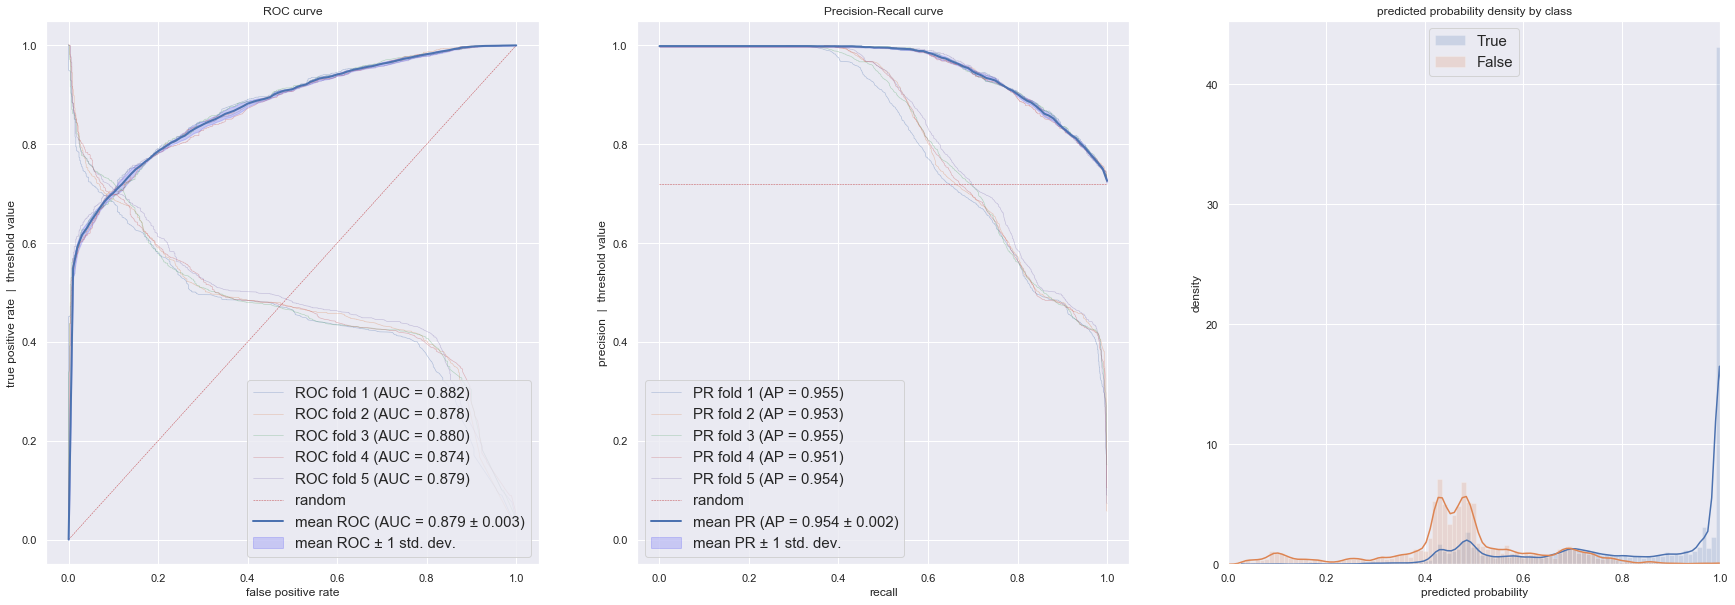

In [7]:
metrics.plot_threshold_decision_curves()

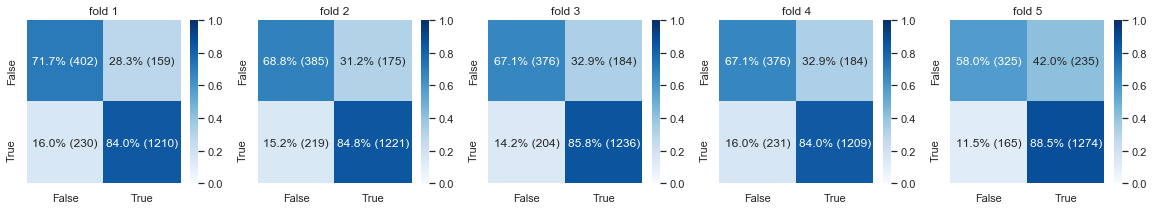

In [8]:
metrics.plot_confusion_matrix()

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → criterion   : ['entropy' 'gini']
  → max_depth   : [5 7 10]
  → n_estimators: [10 20 30]
Best hyperparameters for each fold:
fold 0: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
fold 1: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}
fold 2: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}
fold 3: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}
fold 4: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}


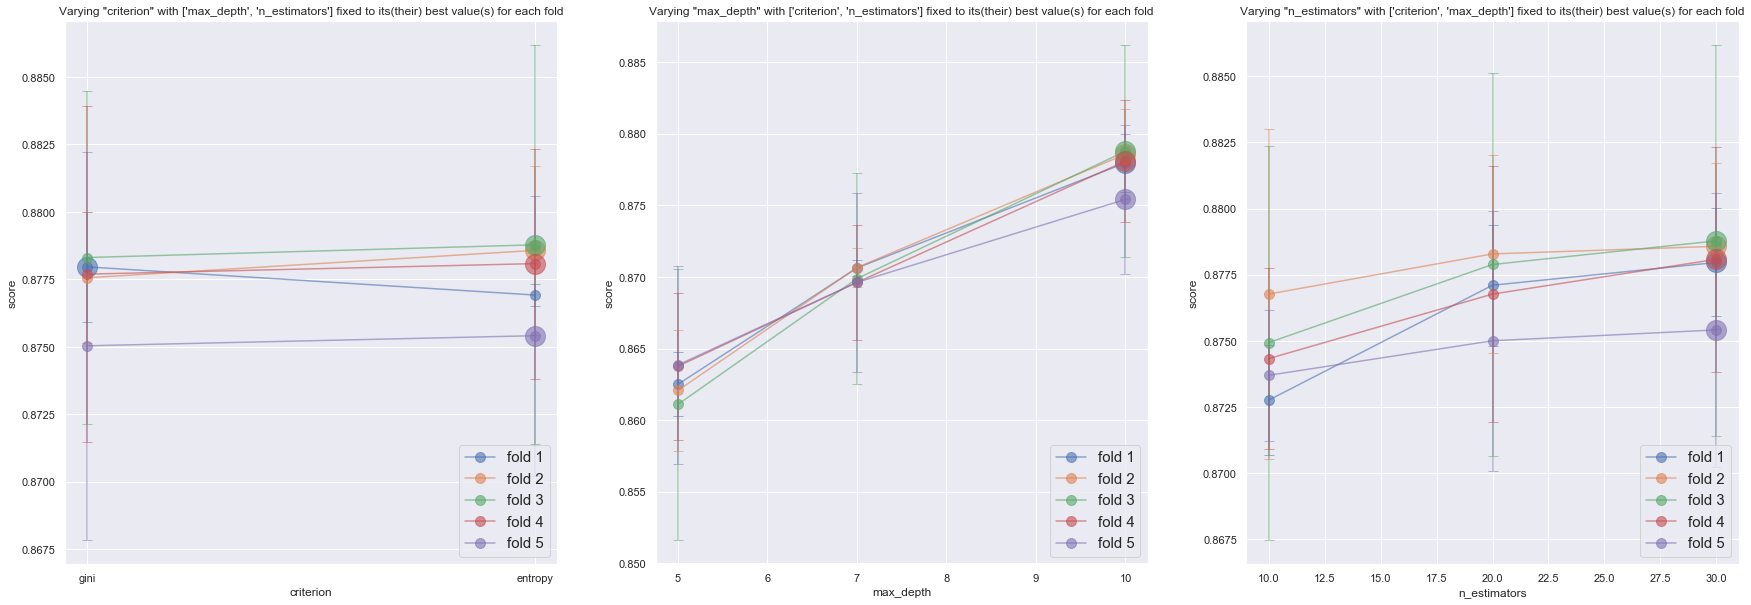

In [9]:
metrics.plot_grid_search_results()